<a href="https://colab.research.google.com/github/adityasahu88/ML_PROJECTS/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabetes Dataset Description**

**Objective:** Predict a quantitative measure of diabetes progression based on input features.

- Number of Instances (Samples): 442
- Number of Features: 10
- Target: A continuous variable measuring the progression of diabetes one year after baseline.

**Features :**The dataset contains 10 baseline physiological features, all numeric and standardized.

- Age: Age of the patient.
- Sex: Gender of the patient.
- BMI: Body mass index.
- BP: Average blood pressure.
- S1: Total serum cholesterol.
- S2: Low-density lipoprotein (LDL) cholesterol.
- S3: High-density lipoprotein (HDL) cholesterol.
- S4: Total cholesterol/HDL cholesterol ratio.
- S5: Log of serum triglycerides level.
- S6: Blood sugar level.

**Target :**
- A continuous value indicating a measure of diabetes progression one year after baseline.


In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# load the dataset
data =load_diabetes()
X = data.data
y=  data.target
features = data.feature_names


df = pd.DataFrame(X,columns = features)
df['target']=y


In [ ]:
# Load the Dataset with sample 10 records
df.head(10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [ ]:

# Shape of the Dataset
print(df.shape)

(442, 11)


In [ ]:

# Describe the Dataset
df.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:

# Information about the Dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [ ]:

# Check for Missing Values
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [ ]:

# Check for Duplicates
print(df.duplicated().sum())


0


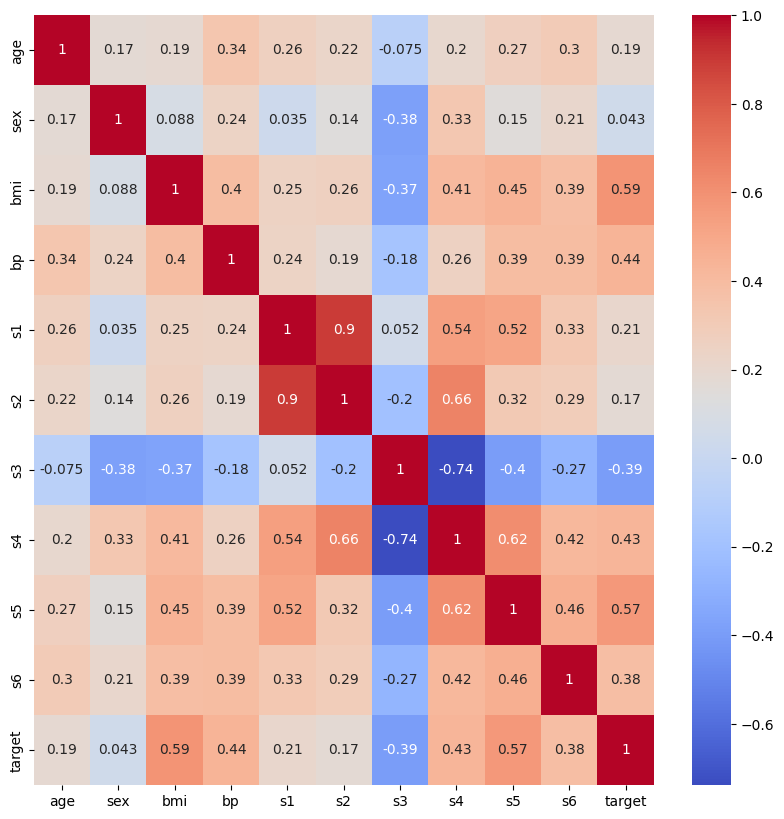

In [ ]:
# Lets Visualize the data in for More EDA
# Correlation factor

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()


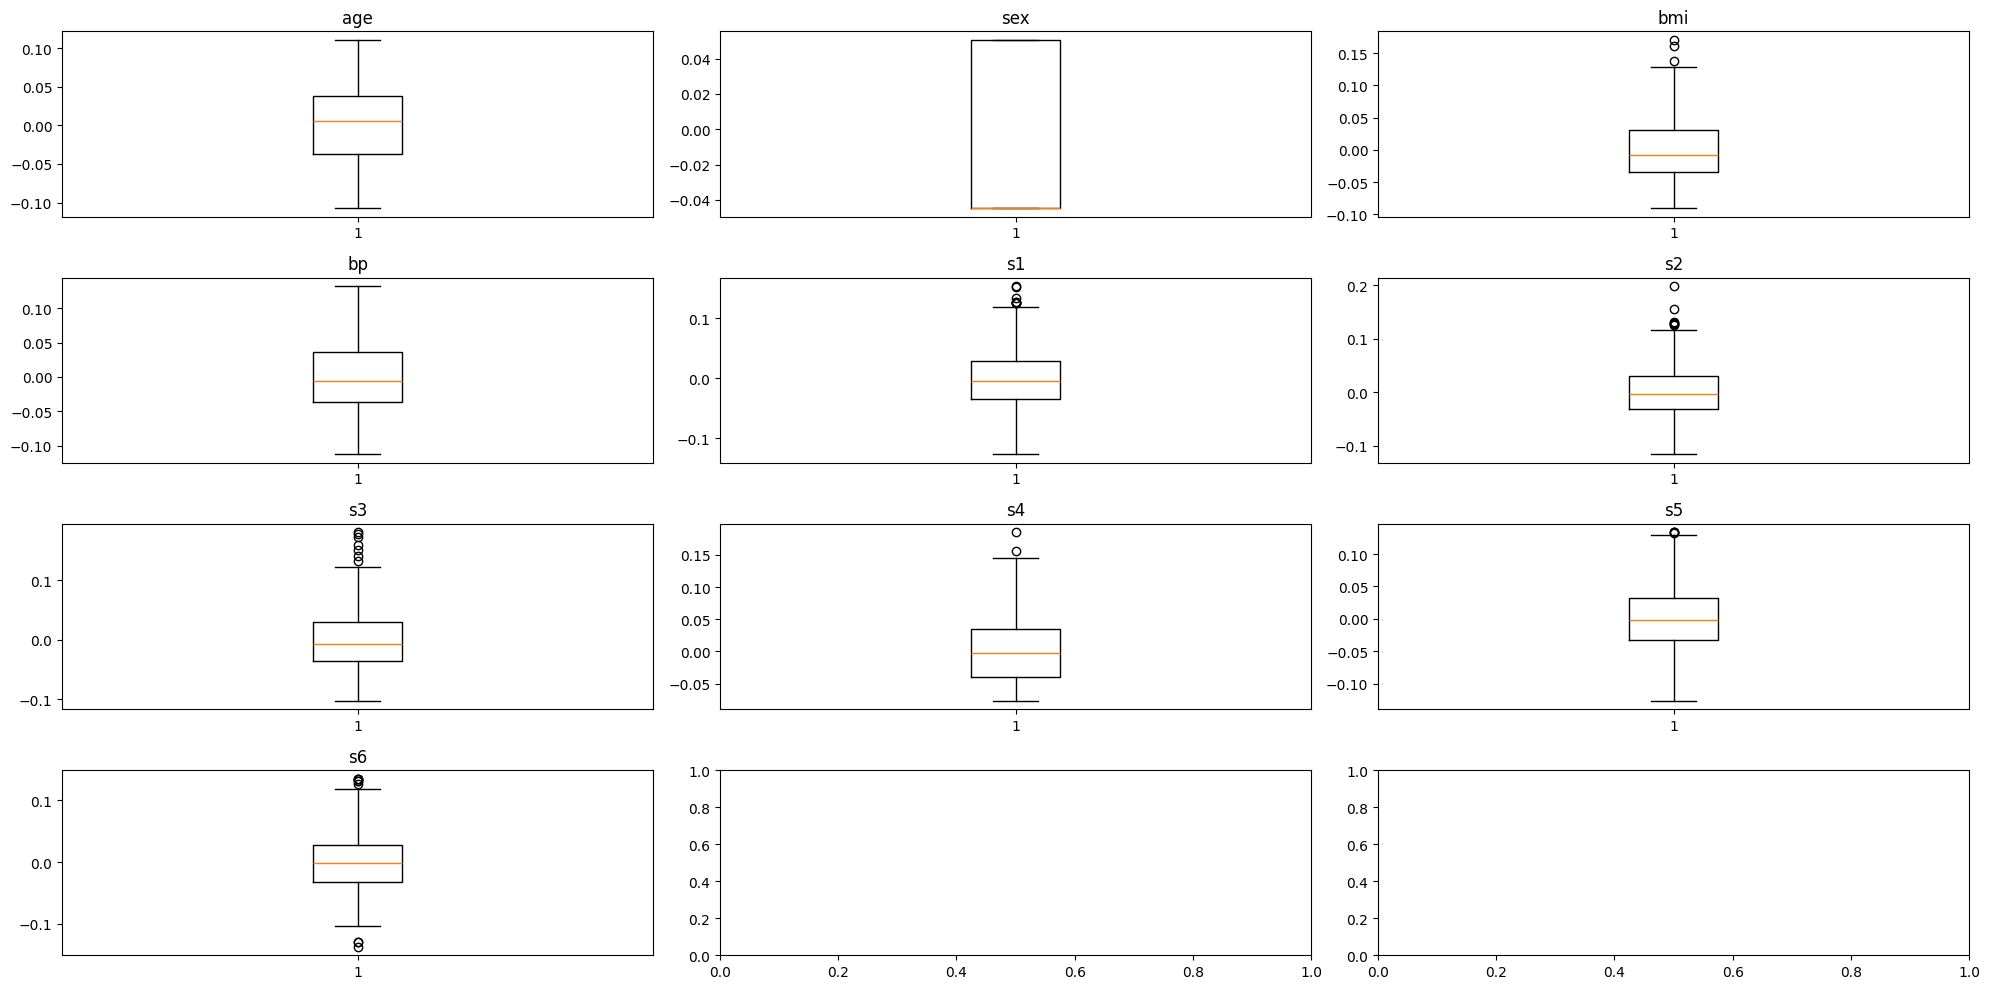

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Check for outliers for each features
no_columns =3
no_features =len(list(df.columns)[:-1])
features =(list(df.columns)[:-1])
no_rows = int(np.ceil((no_features)/no_columns))
plt.subplots(no_rows,no_columns,figsize=(20,10))
for i,column in enumerate(features):
  plt.subplot(no_rows,no_columns,i+1)
  plt.boxplot(df[column])
  plt.title(column)
  plt.tight_layout()
plt.show()

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

print(f"MSE on Train Data: {mean_squared_error(y_train,y_train_pred)}")
print(f"MSE on Test Data: {mean_squared_error(y_test,y_pred)}")
print(f"R2 Score on Train Data: {r2_score(y_train,y_train_pred)}")
print(f"R2 Score on Test Data: {r2_score(y_test,y_pred)}")



MSE on Train Data: 2868.549702835577
MSE on Test Data: 2900.193628493482
R2 Score on Train Data: 0.5279193863361498
R2 Score on Test Data: 0.4526027629719195


**Decision Tree**

In [ ]:
X = df.drop('target',axis=1)
y =df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


model_tree =DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
y_pred = model_tree.predict(X_test)
y_train_pred = model_tree.predict(X_train)


print(f"MSE on Train Data: {mean_squared_error(y_train,y_train_pred)}")
print(f"MSE on Test Data: {mean_squared_error(y_test,y_pred)}")
print(f"R2 Score on Train Data: {r2_score(y_train,y_train_pred)}")
print(f"R2 Score on Test Data: {r2_score(y_test,y_pred)}")

MSE on Train Data: 0.0
MSE on Test Data: 5347.157303370786
R2 Score on Train Data: 1.0
R2 Score on Test Data: -0.009249556671891535


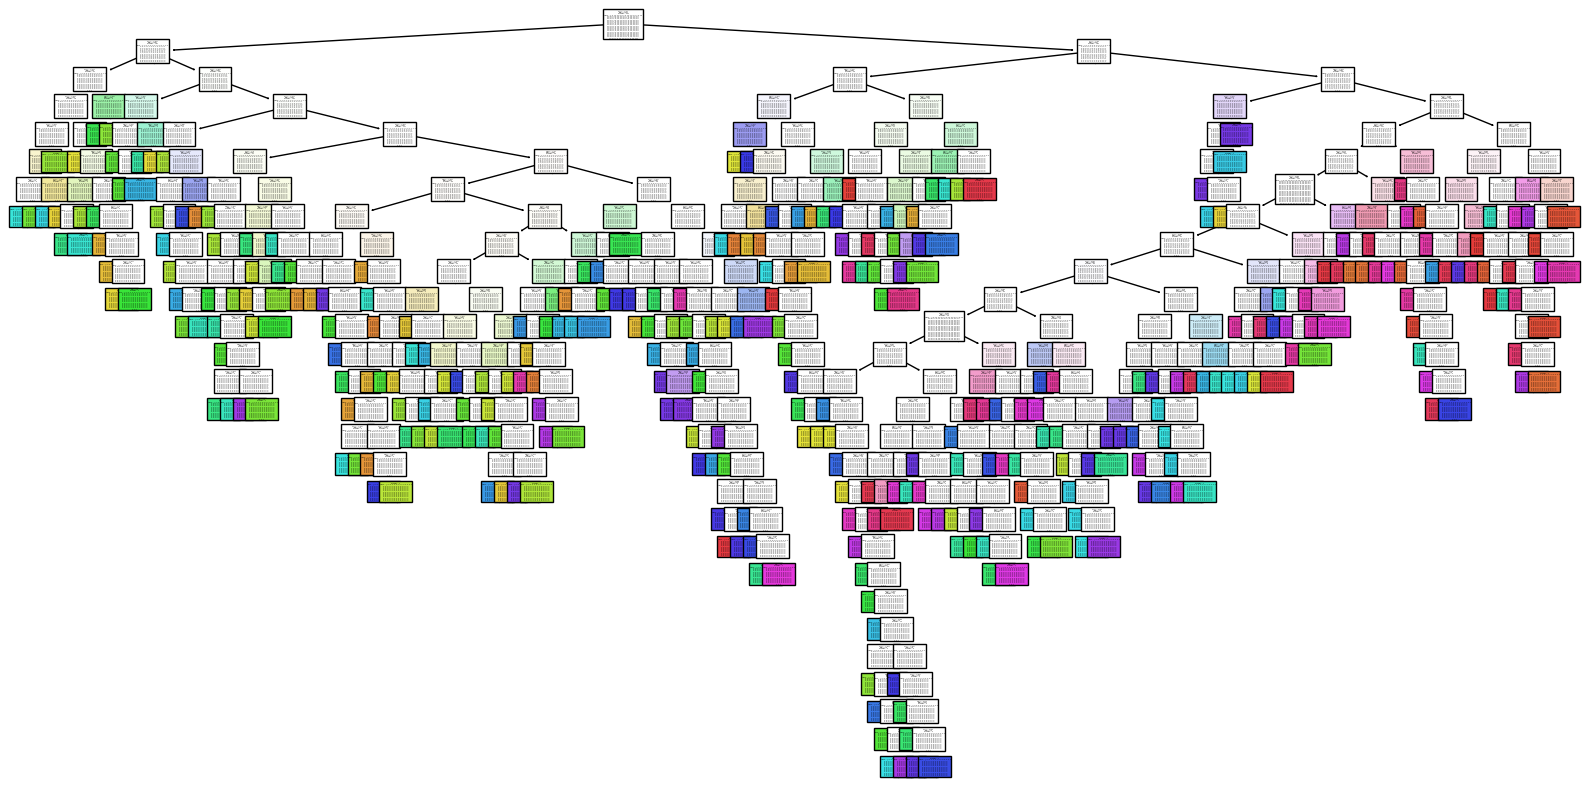

In [ ]:
# visualize the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model_tree,filled=True)
plt.show()

**Random Forest**

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_rf_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf_model.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_rf_model.best_params_)

# Get the best model
best_model = grid_search_rf_model.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy =  mean_squared_error(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}
Accuracy on test set: 4534.797752808989


**KNN**

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param = {
    'n_neighbors': [3, 5, 7, 9,11,13,15,17,19,21],
    'weights': ['uniform', 'distance']

}

grid_search_knn =GridSearchCV(KNeighborsRegressor(),param,cv=5)
grid_search_knn.fit(X_train,y_train)

best_param =grid_search_knn.best_params_

print(f"Best Parameters: {best_param}")

# Get the best model
best_model = grid_search_knn.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Evaluate accuracy on the test set
accuracy = mean_squared_error(y_test, y_pred)
print("mean squared error on test set:", accuracy)

# Evaluate accuracy on the Train set
accuracy = mean_squared_error(y_train, y_pred_train)
print("mean squared error on train set:", accuracy)

Best Parameters: {'n_neighbors': 17, 'weights': 'distance'}
mean squared error on test set: 2945.503657268616
mean squared error on train set: 0.0


**AdaBoost**

In [33]:
from sklearn.ensemble import AdaBoostRegressor

ada =AdaBoostRegressor()
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
y_train_pred = ada.predict(X_train)

print(f"MSE on Train Data: {mean_squared_error(y_train,y_train_pred)}")
print(f"MSE on Test Data: {mean_squared_error(y_test,y_pred)}")

MSE on Train Data: 2242.7898445265955
MSE on Test Data: 2858.130391675353
